In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/Usage data ML.xlsx'  # Make sure this path points to your file
tele = pd.read_excel(file_path)

In [ ]:
# Display the first few rows of the DataFrame
print(tele.head())

   START_DATE       MSISDN     STATUS SUBSCRIBER_TYPE  AMOUNT_VOUCHER  \
0       45377  21621922539  SUSPENDED         PREPAID               0   
1       45377  21621739545  SUSPENDED         PREPAID               0   
2       45377  21620549112  SUSPENDED         PREPAID               0   
3       45377  21620200941  SUSPENDED         PREPAID               0   
4       45377  21625102864  SUSPENDED         PREPAID               0   

   AMOUNT_ETOPUP  AMOUNT_TRANSFERT_IN  AMOUNT_SOS_CREDIT  AMOUNT_SOS_DEBIT  \
0            0.0                  0.0                0.0               0.0   
1            0.0                  0.0                0.0               0.0   
2            0.0                  0.0                0.0               0.0   
3            0.0                  0.0                0.0               0.0   
4            0.0                  0.0                0.0               0.0   

   AMOUNT_TRANSFERT_OUT  ...  AMOUNT_DATA  AMOUNT_VOICE  AMOUNT_SMS  \
0                    

In [ ]:
# As a part of the Data cleansing we check the data for any missing/ na values
tele.isna().sum()

START_DATE              0
MSISDN                  0
STATUS                  0
SUBSCRIBER_TYPE         0
AMOUNT_VOUCHER          0
AMOUNT_ETOPUP           0
AMOUNT_TRANSFERT_IN     0
AMOUNT_SOS_CREDIT       0
AMOUNT_SOS_DEBIT        0
AMOUNT_TRANSFERT_OUT    0
AMOUNT_INJECTION        0
AMOUNT_DATA             0
AMOUNT_VOICE            0
AMOUNT_SMS              0
AMOUNT_VAS              0
AMOUNT_RBT              0
AMOUNT_MMS              0
AMOUNT_USAGE_OTHERS     0
SERVICE_CLASS_ID        0
SERVICE_CLASS_DESC      0
REPAYMENT_SCORE         0
dtype: int64

In [ ]:
# Data Preparation
# Drop columns that are not useful
tele = tele.drop(columns=['START_DATE', 'MSISDN'])

In [ ]:
# Exploratory Data Analysis (EDA)

# Descriptive Statistics
print(tele.describe())
# in the other file there is more analysis

       AMOUNT_VOUCHER  AMOUNT_ETOPUP  AMOUNT_TRANSFERT_IN  AMOUNT_SOS_CREDIT  \
count    29068.000000   29068.000000         29068.000000       29068.000000   
mean         0.087106       0.000845             0.003939           0.018784   
std          0.849728       0.049103             0.117132           0.239999   
min          0.000000       0.000000             0.000000           0.000000   
25%          0.000000       0.000000             0.000000           0.000000   
50%          0.000000       0.000000             0.000000           0.000000   
75%          0.000000       0.000000             0.000000           0.000000   
max         40.000000       5.000000             6.000000          10.000000   

       AMOUNT_SOS_DEBIT  AMOUNT_TRANSFERT_OUT  AMOUNT_INJECTION   AMOUNT_DATA  \
count      29068.000000          29068.000000           29068.0  29068.000000   
mean           0.055199              0.000069               0.0      0.009206   
std            0.570768             

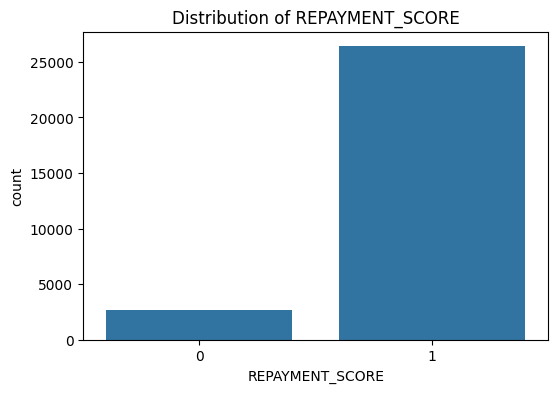

In [ ]:
# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='REPAYMENT_SCORE', data=tele)
plt.title('Distribution of REPAYMENT_SCORE')
plt.show()

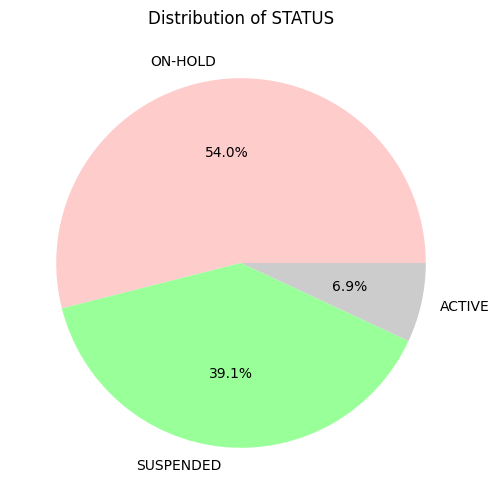

In [ ]:
# Distribution of STATUS
status_counts = tele['STATUS'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', colors=['#ffcccc', '#99ff99', '#cccccc'])
plt.title('Distribution of STATUS')
plt.show()

In [ ]:
# Display the Distribution of SUBSCRIBER_TYPEs
subscriber_type_counts = tele['SUBSCRIBER_TYPE'].value_counts()
print(subscriber_type_counts)

SUBSCRIBER_TYPE
PREPAID    28756
HYB          312
Name: count, dtype: int64


In [ ]:
# Separate features and target variable
X = tele.drop(columns=['REPAYMENT_SCORE'])
y = tele['REPAYMENT_SCORE']

# Identify categorical and numerical columns
categorical_features = ['STATUS', 'SUBSCRIBER_TYPE', 'SERVICE_CLASS_ID', 'SERVICE_CLASS_DESC']
numerical_features = X.columns.difference(categorical_features)

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Create a pipeline with the preprocessor and the classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

In [ ]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.979016167870657
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.78      0.88       567
           1       0.98      1.00      0.99      5247

    accuracy                           0.98      5814
   macro avg       0.99      0.89      0.93      5814
weighted avg       0.98      0.98      0.98      5814

Confusion Matrix:
 [[ 445  122]
 [   0 5247]]


In [ ]:
# print the scores on training and test set
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

print('Training set score: {:.4f}'.format(pipeline.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(pipeline.score(X_test, y_test)))

Training set score: 0.9787
Test set score: 0.9790


The training and test scores are very close to each other (97.87% vs. 97.90%), suggesting that the model is neither overfitting nor underfitting.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-7-4b546655ca94>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=recharge_counts, palette='viridis')


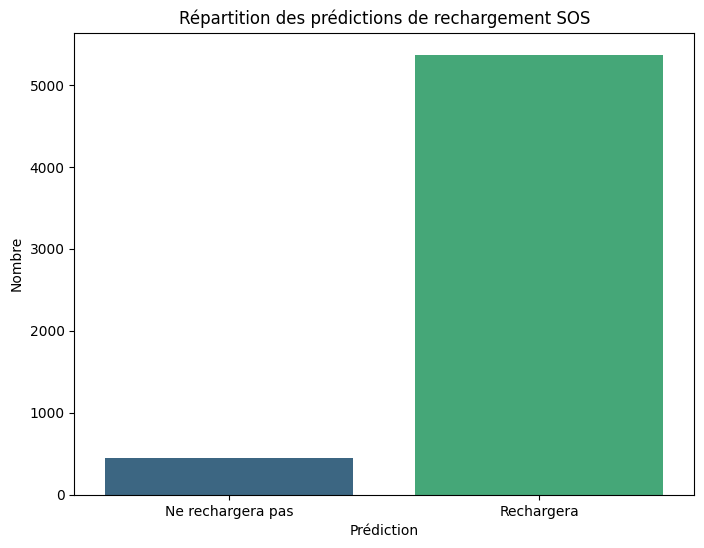

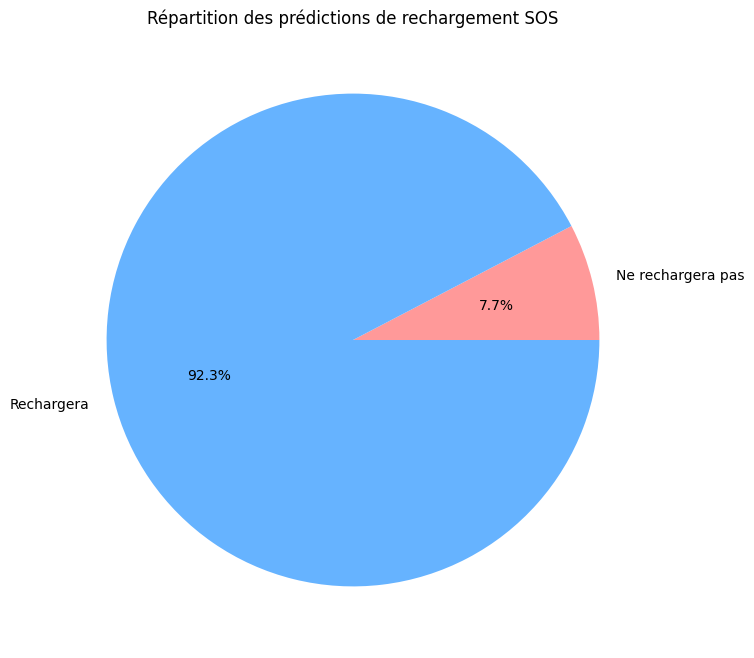

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Charger les données depuis Google Drive
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Usage data ML.xlsx'  # Assurez-vous que ce chemin pointe vers votre fichier
tele = pd.read_excel(file_path)

# Préparation des données
tele = tele.drop(columns=['START_DATE', 'MSISDN'])

# Séparer les caractéristiques et la variable cible
X = tele.drop(columns=['REPAYMENT_SCORE'])
y = tele['REPAYMENT_SCORE']

# Identifier les colonnes catégorielles et numériques
categorical_features = ['STATUS', 'SUBSCRIBER_TYPE', 'SERVICE_CLASS_ID', 'SERVICE_CLASS_DESC']
numerical_features = X.columns.difference(categorical_features)

# Créer un ColumnTransformer pour le prétraitement
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Créer un pipeline avec le préprocesseur et le classifieur
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le modèle
pipeline.fit(X_train, y_train)

# Faire des prédictions
y_pred = pipeline.predict(X_test)

# Compter les prédictions positives et négatives
recharge_counts = np.bincount(y_pred)
labels = ['Ne rechargera pas', 'Rechargera']

# Tracer un graphique en barres
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=recharge_counts, palette='viridis')
plt.title('Répartition des prédictions de rechargement SOS')
plt.xlabel('Prédiction')
plt.ylabel('Nombre')
plt.show()

# Optionnel: Tracer un diagramme circulaire
plt.figure(figsize=(8, 8))
plt.pie(recharge_counts, labels=labels, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Répartition des prédictions de rechargement SOS')
plt.show()


Mounted at /content/drive
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88       567
           1       0.98      1.00      0.99      5247

    accuracy                           0.98      5814
   macro avg       0.99      0.89      0.93      5814
weighted avg       0.98      0.98      0.98      5814

Confusion Matrix:
[[ 445  122]
 [   0 5247]]
AUC: 0.95


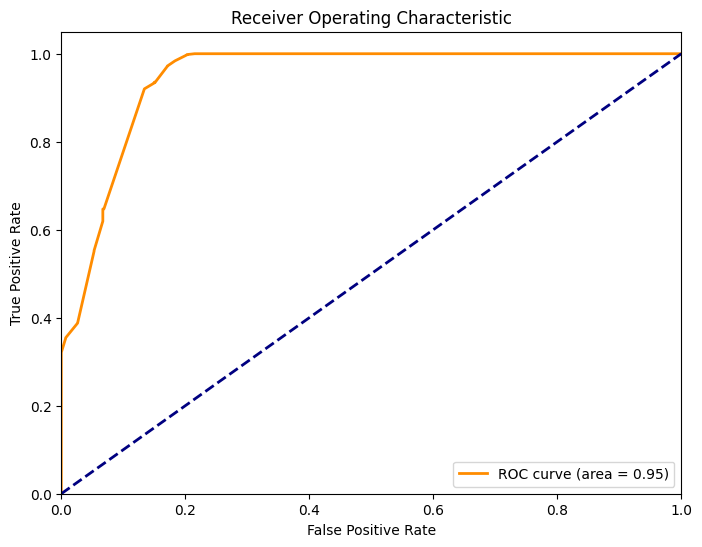

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import numpy as np

# Charger les données depuis Google Drive
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Usage data ML.xlsx'  # Assurez-vous que ce chemin pointe vers votre fichier
tele = pd.read_excel(file_path)

# Préparation des données
tele = tele.drop(columns=['START_DATE', 'MSISDN'])

# Séparer les caractéristiques et la variable cible
X = tele.drop(columns=['REPAYMENT_SCORE'])
y = tele['REPAYMENT_SCORE']

# Identifier les colonnes catégorielles et numériques
categorical_features = ['STATUS', 'SUBSCRIBER_TYPE', 'SERVICE_CLASS_ID', 'SERVICE_CLASS_DESC']
numerical_features = X.columns.difference(categorical_features)

# Créer un ColumnTransformer pour le prétraitement
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Créer un pipeline avec le préprocesseur et le classifieur
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le modèle
pipeline.fit(X_train, y_train)

# Faire des prédictions
y_pred = pipeline.predict(X_test)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Faire des prédictions probabilistes
y_prob = pipeline.predict_proba(X_test)[:, 1]

# Calculer les courbes ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculer l'aire sous la courbe (AUC)
roc_auc = roc_auc_score(y_test, y_prob)
print(f'AUC: {roc_auc:.2f}')

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
